In [10]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [11]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("Resources/singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


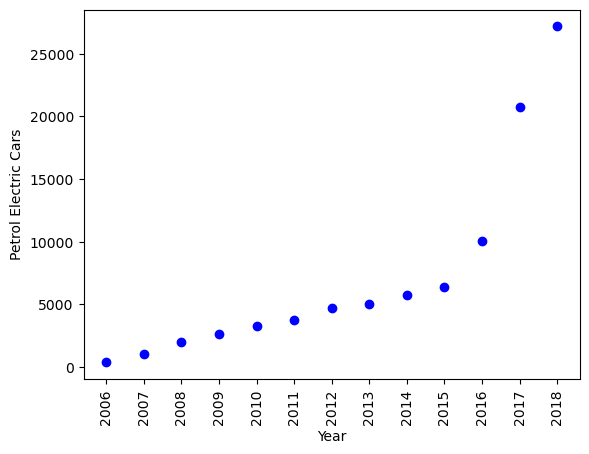

In [12]:
# Generate a scatter plot of year versus number of petrol-electric cars
year = vehicle_data.loc[(vehicle_data["type"] == "Cars") & (vehicle_data["engine"]=="Petrol-Electric"),"year"]
petrol_electric_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol-Electric"),"number"]
plt.scatter(year, petrol_electric_cars, color="blue")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

In [13]:
# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(year, petrol_electric_cars)
print(
    f"The slope is: {pe_slope}\n"
    f"The intercept is: {pe_int}\n"
    f"The correlation coefficient is: {pe_r}\n"
    f"The p-value is: {pe_p}\n"
    f"The standard error is: {pe_std_err}"
)

The slope is: 1697.0
The intercept is: -3407212.4615384615
The correlation coefficient is: 0.8283085849341516
The p-value is: 0.0004691419895415732
The standard error is: 346.09265015728346


In [14]:
# Create equation of line to calculate predicted number of petrol-electric cars
pe_fit = pe_slope * year + pe_int
print(pe_fit)

2      -3030.461538
32     -1333.461538
62       363.538462
92      2060.538462
122     3757.538462
152     5454.538462
182     7151.538462
212     8848.538462
242    10545.538462
272    12242.538462
302    13939.538462
332    15636.538462
362    17333.538462
Name: year, dtype: float64


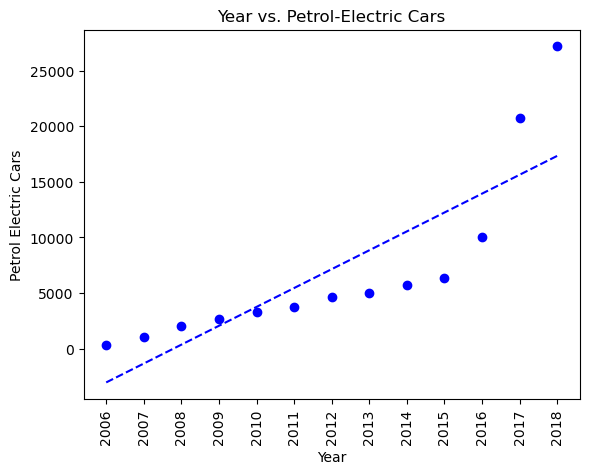

In [15]:
# Plot the linear model on top of scatter plot 
plt.scatter(year,petrol_electric_cars, color="b")
plt.plot(year,pe_fit,"b--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.title('Year vs. Petrol-Electric Cars')
plt.show()

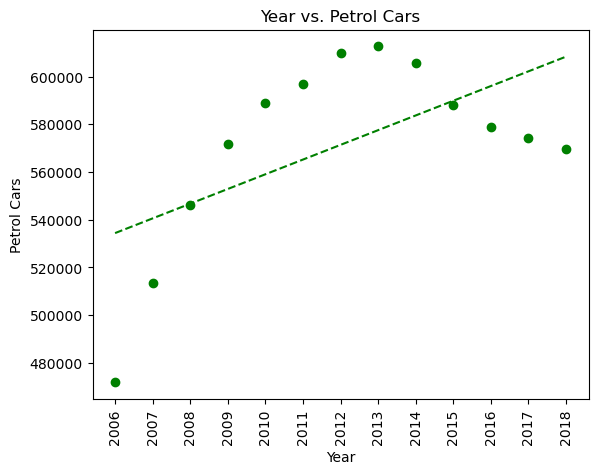

In [16]:
# Repeat plotting scatter and linear model for year versus petrol cars
petrol_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol"), "number"]
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(year, petrol_cars)
p_fit = p_slope * year + p_int
plt.scatter(year,petrol_cars, color="g")
plt.plot(year,p_fit,"g--")
plt.xticks(year, rotation=90) 
plt.xlabel('Year')
plt.ylabel('Petrol Cars')
plt.title('Year vs. Petrol Cars')
plt.show()

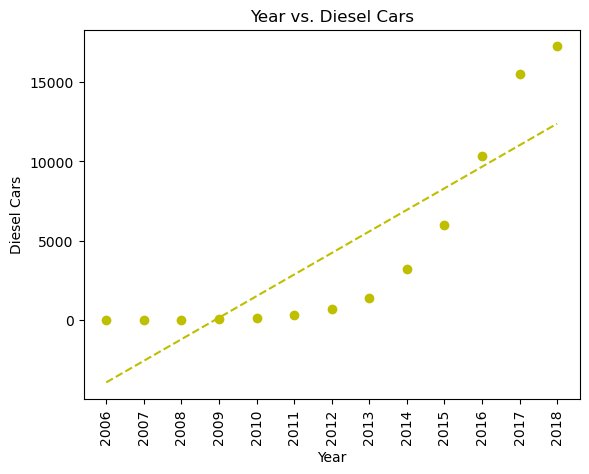

In [17]:
# Repeat plotting scatter and linear model for year versus diesel cars
diesel_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Diesel"), "number"]
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(year, diesel_cars)
d_fit = d_slope * year + d_int
plt.scatter(year,diesel_cars, color="y")
plt.plot(year,d_fit,"y--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Diesel Cars')
plt.title('Year vs. Diesel Cars')
plt.show()

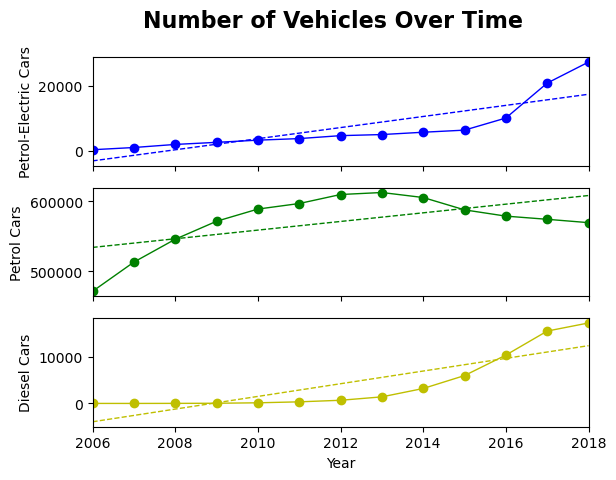

In [23]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Number of Vehicles Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, petrol_electric_cars, linewidth=1, marker="o", color="b")
ax1.plot(year, pe_fit, "b--", linewidth=1)
ax1.set_ylabel("Petrol-Electric Cars")

ax2.plot(year, petrol_cars, linewidth=1, marker="o", color="g")
ax2.plot(year, p_fit, "g--", linewidth=1)
ax2.set_ylabel("Petrol Cars")

ax3.plot(year, diesel_cars, linewidth=1, marker="o", color="y")
ax3.plot(year, d_fit, "y--", linewidth=1)
ax3.set_ylabel("Diesel Cars")
ax3.set_xlabel("Year")

plt.savefig("Resources/no._of_vehiclescombined_graph.png", bbox_inches="tight")
plt.show()

In [19]:
# Calculate the number of cars for 2024
yr_no = 2024
print(
    f"The number of petrol-electric cars in {yr_no} will be {round(pe_slope * yr_no + pe_int, 0)}.\n"
    f"The number of petrol cars in {yr_no} will be {round(p_slope * yr_no + p_int, 0)}.\n"
    f"The number of diesel cars in {yr_no} will be {round(d_slope * yr_no + d_int, 0)}.")

The number of petrol-electric cars in 2024 will be 27516.0.
The number of petrol cars in 2024 will be 645370.0.
The number of diesel cars in 2024 will be 20541.0.
